# 1. Importing libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Loading dataset

In [12]:
df = pd.read_csv("dataset/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
states = df["State"]
np.unique(df["State"])

array(['California', 'Florida', 'New York'], dtype=object)

In [14]:
labelencoder = LabelEncoder()
df["State"] = labelencoder.fit_transform(states)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# 3. Splitting data into train/test

In [15]:
np.random.seed(0)

X = df[["R&D Spend", "Administration", "Marketing Spend", "State"]].values
y = df["Profit"].values

scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X = scalerX.fit_transform(X)
y = y.reshape(-1,1)
y = scalerY.fit_transform(y)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

# 4. Multiple-linear Regression

In [16]:
ml_reg = LinearRegression()
ml_reg.fit(X_train,y_train)

y_pred = ml_reg.predict(X_test)

MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print("MSE = ", MSE)
print("R² = ", R2)

MSE =  0.002659474719757505
R² =  0.9403937677545078


# 5. Comparing the predicted results with the actual target output

In [17]:
y_test = scalerY.inverse_transform(y_test)
y_pred = scalerY.inverse_transform(y_pred)

In [18]:
TestingData=pd.DataFrame(data=y_test, columns=["actual income"])
TestingData['predicted income']=y_pred

TestingData

,actual income,predicted income
0,134307.35,126568.769413
1,81005.76,86103.320655
2,99937.59,98856.919704
3,64926.08,45879.381899
4,125370.37,127503.114500
5,35673.41,51963.502584
6,105733.54,108272.774098
7,107404.34,100861.531542
8,97427.84,98046.227651
9,122776.86,111719.288512


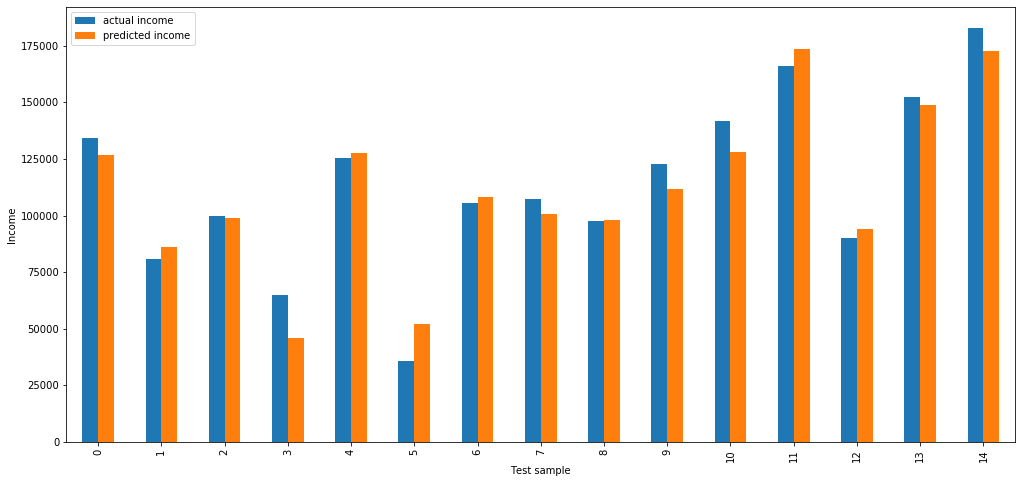

In [19]:
TestingData.plot.bar(figsize=(17, 8))
plt.ylabel("Income")
plt.xlabel("Test sample")
plt.show()